# Курсовая работа
## По курсу «Теория вероятностей и математическая статистика»
##                Тема: «Метод наименьших квадратов»
Выполнил **Свистельников Илья**

## Описание модели и вариант

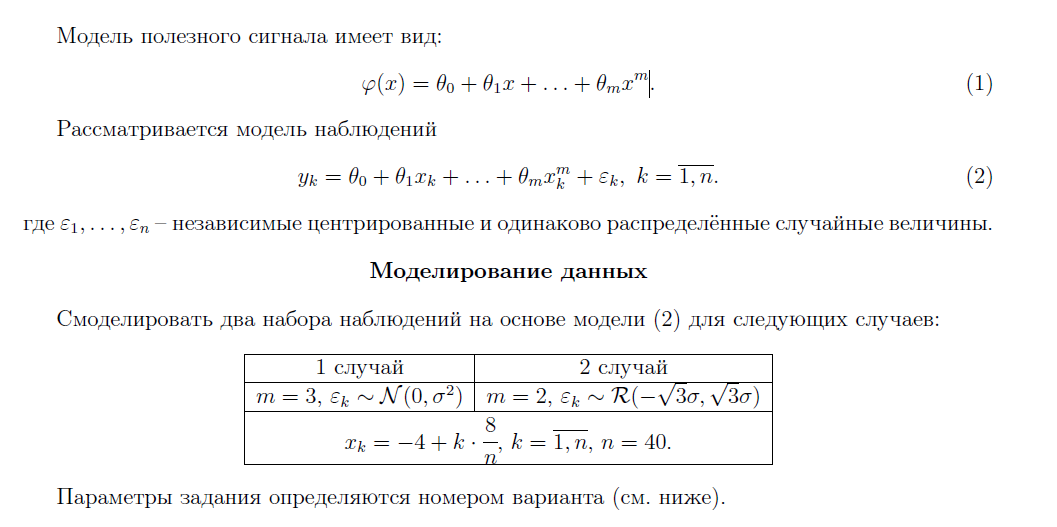

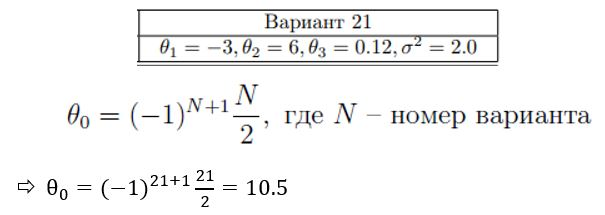

## Задание
Для обоих случаев выполнить по очереди следующие задания.

1. Подобрать порядок многочлена $\hat{m} \geq 1$ в модели (1), используя **критерий Фишера** на уровне значимости $0.05$, и вычислить оценки неизвестных параметров $(\theta_0, \ldots, \theta_{\hat{m}})$ **методом наименьших квадратов**.

2. В предположении нормальности ошибок **построить доверительные интервалы** уровней надёжности $\alpha_1 = 0.95$ и $\alpha_2 = 0.99$ для параметров $(\theta_0, \ldots, \theta_{\hat{m}})$.

3. В предположении нормальности ошибок **построить доверительные интервалы** уровней надёжности $\alpha_1 = 0.95$ и $\alpha_2 = 0.99$ для полезного сигнала (1).

4. Представить графически:

   • истинный полезный сигнал,


   • набор наблюдений,


   • оценку полезного сигнала, полученную в шаге 1,

   
   • доверительные интервалы полезного сигнала, полученные в шаге 3.

5. По остаткам регрессии построить оценку плотности распределения случайной ошибки наблюдения в виде гистограммы.

6. В предположении нормальности ошибок вычислить оценку максимального правдоподобия дисперсии $\sigma^2$ случайной ошибки.

7. По остаткам регрессии с помощью **$\chi^2$-критерия Пирсона** на уровне значимости $0.05$ проверить гипотезу о том, что закон распределения ошибки наблюдения является нормальным.

Перед решением задачи требуется сгенерировать выборку объемом $n = 40$. Сделаем это благодаря методам normal (нормальное) и uniform (равномерное).


## Первый случай

Порядок исходного сигнала m = 3.
Исходная выборка $Y_{(40\times1)}$:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m=3
n=40
sigma = 2.0

X = np.array([-4+k*8/n for k in range(1, n+1)])
print ("Вектор иксов:", X)

Вектор иксов: [-3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6 -1.4 -1.2
 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6
  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4. ]


**Если хотим сгенерировать новые ошибки:**

In [ ]:
theta = np.array([10.5, -3, 6, 0.12])
eps = np.random.normal(0, sigma, n)

Y = np.zeros(40)
for k in range(40):
  for i in range(m+1):
    Y[k] += theta[i]*X[k]**i
#print('\n',Y)
Y = Y + eps

Если не хотим:

In [ ]:
theta = np.array([10.5, -3, 6, 0.12])
eps = np.array([-0.86227217, -1.40821577, 0.21660392, 1.05343638, -1.12396316, -0.99434606, 0.26899492, 1.45106961, -4.52922157, 0.96785611, -1.20313183, 0.16063272, -0.35164642, -2.50146794, -0.62726707, 0.83012053, -1.51718843, 3.8313596, 1.34945861, -1.75938104, -1.02821701, -1.1512084, 1.03745267, 3.2763356, 3.40716011, -0.88282623, 1.49850074, -1.93012034, -0.11495058, 1.80269933, -1.50736032, 0.20610548, -0.02960828, 2.42694659, -0.94889339, 0.58839857, -1.39212553, -4.0243005, 1.68609004, -1.21144734])

Y = np.zeros(40)
for k in range(40):
  for i in range(m+1):
    Y[k] += theta[i]*X[k]**i
#print('\n',Y)

In [ ]:
print("Вектор ошибок:", eps)
#print(eps.size)
print('\n',Y)

Вектор ошибок: [-0.86227217 -1.40821577  0.21660392  1.05343638 -1.12396316 -0.99434606
  0.26899492  1.45106961 -4.52922157  0.96785611 -1.20313183  0.16063272
 -0.35164642 -2.50146794 -0.62726707  0.83012053 -1.51718843  3.8313596
  1.34945861 -1.75938104 -1.02821701 -1.1512084   1.03745267  3.2763356
  3.40716011 -0.88282623  1.49850074 -1.93012034 -0.11495058  1.80269933
 -1.50736032  0.20610548 -0.02960828  2.42694659 -0.94889339  0.58839857
 -1.39212553 -4.0243005   1.68609004 -1.21144734]

 [101.95536  93.46128  85.34352  77.60784  70.26     63.30576  56.75088
  50.60112  44.86224  39.54     34.64016  30.16848  26.13072  22.53264
  19.38     16.67856  14.43408  12.65232  11.33904  10.5      10.14096
  10.26768  10.88592  12.00144  13.62     15.74736  18.38928  21.55152
  25.23984  29.46     34.21776  39.51888  45.36912  51.77424  58.74
  66.27216  74.37648  83.05872  92.32464 102.18   ]


# Задание 1.1

Основная и альтернативная гипотеза критерия Фишера имеют вид:
$$H_0: B\Theta = C;$$
$$H_1: B\Theta \neq C,$$

где $B_{q \times (p+1)}$ - матрица, $\Theta_{(p+1) \times 1}$ - матрица параметров модели (1), $C_{q \times 1}$ - вектор констант.

Статистика критерия имеет вид:
$$
F(Z_n) = \frac{(B\hat{\Theta} - C)^T (B(A^T A)^{-1} B^T)^{-1} (B\hat{\Theta} - C)}{q} \cdot \frac{n - (p+1)}{(Y - A\hat{\Theta})^T (Y - A\hat{\Theta})}
$$
где $n$ - объем выборки, $Y_{n \times 1}$ - выборка,
$$
A_{n \times (p+1)} = \begin{pmatrix}
f_1(x_{11},\ldots,x_{1m}) & \cdots & f_{p+1}(x_{11},\ldots,x_{1m}) \\
\vdots & \ddots & \vdots \\
f_1(x_{n1},\ldots,x_{nm}) & \cdots & f_{p+1}(x_{n1},\ldots,x_{nm})
\end{pmatrix}
$$
$\hat{\Theta}$ - матрица точечных МНК-оценок параметров $\theta$, $q$ - количество строк в матрице $B$, $p+1$ - количество оцениваемых параметров.

Для проверки критерия требуется рассчитать $Z$ и рассмотреть - попала ли статистика в критическую область, которая имеет вид:
$$G_{1\alpha} = (f_{1-\alpha,q,n-(p+1)}, +\infty)$$
где $f_{1-\alpha,q,n-(p+1)}$ - квантиль распределения Фишера с уровнем надежности $1 - \alpha$ и параметрами $q$, $n - (p + 1)$.

Если статистика попала в этот промежуток - принимается альтернативная гипотеза. Иначе - основная.

При проверке порядка $\hat{m}$ модели (1): $B_{1 \times (p+1)} = (0 \ldots 1)$, $B_{q \times 1} = 0$, так как требуется проверить равенство нулю последнего параметра, чтобы оценить порядок.

Тогда статистика будет иметь вид:
$$
F(Z_n) = \frac{\hat{\theta}_p^2}{c_{(p+1),(p+1)}} \cdot \frac{n - (p+1)}{(Y - A\hat{\Theta})^T (Y - A\hat{\Theta})}
$$
где $\hat{\theta}_p$ - точечная МНК-оценка параметра $\theta_p$, $c_{(p+1),(p+1)}$ - $(p+1)$-ый элемент главной диагонали матрицы $(A^T A)^{-1}$.

In [ ]:
def kriteriy_Fishera(p, A_T, vector_Y):
  A = A_T.T
  W = np.linalg.inv(np.dot(A_T, A))
  с = W[p][p] # элемент на главной диагонали матрицы (A^T*A)^-1

  Th = W.dot(A_T).dot(vector_Y) # тета-крышка

  E = vector_Y - np.dot(A, Th)
  S_h = np.dot(E.T, E) # S с крышкой (сумма квадратов остатков)

  Z = (n - (p + 1)) * Th[p] ** 2 / (с * S_h)
  return Z, Th

Начнем с p=1

In [ ]:
p=1
A1_T = np.array([np.ones(n), X])

Z, Th1 = kriteriy_Fishera(p, A1_T, Y)
print(Z, '\n', Th1)

0.08732090292124835 
 [42.3650625  -0.59060945]


Уровень значимости $\alpha = 0.05$, следовательно, уровень надежности $1 - \alpha = 0.95$

$$f_{0.95,\,1,\,40-2} \approx 4.098$$

Значение Z < 4.098, значит статистика попала в доверительную область, следовательно, порядок многочлена для модели (1) есть p-1 = **0**

Порядок многочлена $\hat{m} = p - 1 = 0$ для модели (1).

Переопределим теперь главные матрицы

In [ ]:
A1_T = np.array([np.ones(n)])
Th = 1/n * A1_T @ Y
print(Th)
W = 1/n
E1 = Y - np.dot(A1_T.T, Th)
print(E1)
S1 = np.dot(E1.T, E1)
print(S1)

[42.30600155]
[ 58.78708628  49.74706268  43.25412237  36.35527482  26.83003529
  20.00541238  14.71387337   9.74618805  -1.97298312  -1.79814544
  -8.86897338 -11.97688884 -16.52692797 -22.2748295  -23.55326863
 -24.79732102 -29.38910998 -25.82232196 -29.61750294 -33.56538259
 -33.19325856 -33.18952996 -30.38262888 -27.02822595 -25.27884144
 -27.44146779 -22.41822081 -22.68460189 -17.18111214 -11.04330222
  -9.59560188  -2.58101608   3.03351016  11.89518504  15.48510506
  24.55455701  30.67835292  36.72841795  51.70472848  58.6625511 ]
32437.710242195717


МНК-оценки параметров $\hat{\theta}$ вычисляются по формуле $(A^T A)^{-1} A^T Y$.

$\hat{\theta}_{1 \times 1} = (42.30600155)$

In [ ]:
P = p-1
P

0

# Задание 1.2

В предположении нормальности ошибок для построения доверительных интервалов параметров $\theta$ используется соответствующая формула:
$$
P\left(\hat{\theta}_j - t_{1-\alpha/2,\,n-p} \sqrt{\frac{c_{jj} S(\hat{\theta})}{n-p}} \leq \theta_j \leq \hat{\theta}_j + t_{1-\alpha/2,\,n-p} \sqrt{\frac{c_{jj} S(\hat{\theta})}{n-p}}\right) = 1 - \alpha
$$
где $t_{1-\alpha/2,\,n-p}$ - квантиль распределения Стьюдента с уровнем надежности $1 - \alpha/2$ и количеством степеней свободы $n - p$, $p$ - количество параметров $\theta$, $c_{jj}$ - элемент, стоящий на пересечении $j$-ой строки и $j$-ого столбца матрицы $(A^T A)^{-1}$, $S(\hat{\theta}) = (Y - A\hat{\Theta})^T (Y - A\hat{\Theta})$.

Уровни надежности $\alpha_1 = 0.95$ и $\alpha_2 = 0.99$, следовательно:

$1 - \alpha_1/2 = 0.975$, $1 - \alpha_2/2 = 0.995$,

 $t_{0.975,\,39} \approx 2.0227$; $t_{0.995,\,39} \approx 2.7079$

In [ ]:
t_975 = 2.0227
t_995 = 2.7079

for i in range(P+1):
  l1 = Th[i] - t_975*np.sqrt((W*S1)/(n-P-1))
  r1 = Th[i] + t_975*np.sqrt((W*S1)/(n-P-1))
  l2 = Th[i] - t_995*np.sqrt((W*S1)/(n-P-1))
  r2 = Th[i] + t_995*np.sqrt((W*S1)/(n-P-1))
  print(f"Доверительный интервал уровня надежности 0.95 для тета_{i}: {l1} <= {Th[i]} <= {r1}")
  print(f"Доверительный интервал уровня надежности 0.99 для тета_{i}: {l2} <= {Th[i]} <= {r2}")

Доверительный интервал уровня надежности 0.95 для тета_0: 33.08253302400401 <= 42.30600155390672 <= 51.52947008380943
Доверительный интервал уровня надежности 0.99 для тета_0: 29.958035749722434 <= 42.30600155390672 <= 54.653967358091


# Задание 1.3

Для построения доверительных интервалов полезного сигнала $\theta_0 + \theta_1 x + \cdots + \theta_m x^m$ используется формула:
$$
P\left(\hat{\theta}_0 + \hat{\theta}_1 x + \cdots + \hat{\theta}_m x^m - t_{1-\alpha/2,\,n-p} \sqrt{\frac{f^T (A^T A)^{-1} f S(\hat{\theta})}{n-p}} \leq \theta_0 + \theta_1 x + \cdots + \theta_m x^m \leq \hat{\theta}_0 + \hat{\theta}_1 x + \cdots + \hat{\theta}_m x^m + t_{1-\alpha/2,\,n-p} \sqrt{\frac{f^T (A^T A)^{-1} f S(\hat{\theta})}{n-p}}\right) = 1 - \alpha
$$
где $f_{(m+1) \times 1} = \begin{pmatrix} 1 \\ x \\ \vdots \\ x^m \end{pmatrix}$, остальные обозначения есть выше.

Уровни надежности $\alpha_1 = 0.95$ и $\alpha_2 = 0.99$, следовательно:

$1 - \alpha_1/2 = 0.975$, $1 - \alpha_2/2 = 0.995$,

 $t_{0.975,\,39} \approx 2.0227$; $t_{0.995,\,39} \approx 2.7079$

Доверительные интервалы:

In [ ]:
lower1 = Th[0] - t_975*np.sqrt((S1/(n-P-1)) *  W)
upper1 = Th[0] + t_975*np.sqrt((S1/(n-P-1)) *  W)
lower2 = Th[0] - t_995*np.sqrt((S1/(n-P-1)) *  W)
upper2 = Th[0] + t_995*np.sqrt((S1/(n-P-1)) *  W)

print("Доверительный интервал уровня надёжности 0.95:")
print(lower1, "< theta_0 <", upper1)
print("Доверительный интервал уровня надёжности 0.99:")
print(lower2, "< theta_0 <", upper2)

Доверительный интервал уровня надёжности 0.95:
33.08253302400401 < theta_0 < 51.52947008380943
Доверительный интервал уровня надёжности 0.99:
29.958035749722427 < theta_0 < 54.65396735809101


# Задание 1.4

**Набор наблюдений, истинный полезный сигнал, его оценка и доверительный интервал для уровня надежности 0.95:**

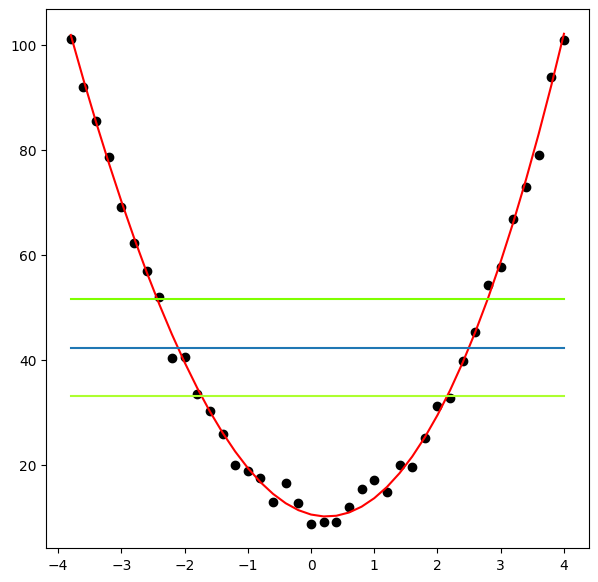

In [ ]:
phi = Y - eps
theta_0_np = np.ones(n)*Th[0]
lw1_np = np.ones(n)*lower1
up1_np = np.ones(n)*upper1

plt.figure(figsize=(7, 7))
plt.plot(X, phi, color = 'r') # теор. сигнал
plt.plot(X, theta_0_np) # его оценка
plt.scatter(X, Y, color = 'black') # набор наблюдений
plt.plot(X, lw1_np, color = 'greenyellow')
plt.plot(X, up1_np, color = 'chartreuse')

**Набор наблюдений, истинный полезный сигнал, его оценка и доверительный интервал для уровня надежности 0.99:**

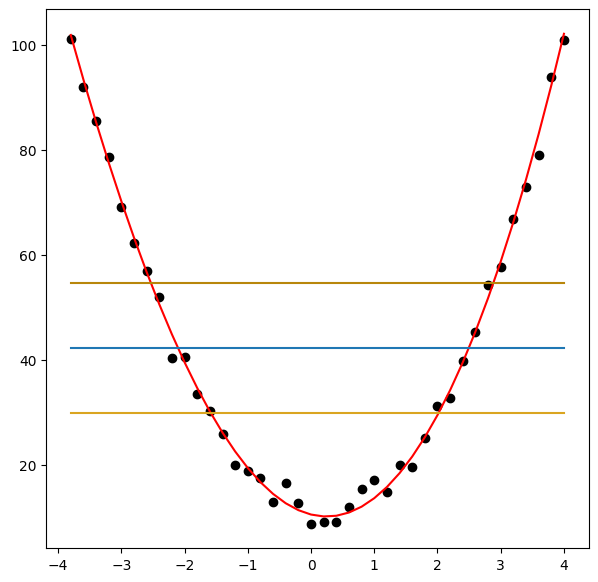

In [ ]:
lw2_np = np.ones(n)*lower2
up2_np = np.ones(n)*upper2

plt.figure(figsize=(7, 7))
plt.scatter(X, Y, color = 'black')
plt.plot(X, phi, color = 'r') # теор. сигнал
plt.plot(X, theta_0_np) # его оценка
plt.plot(X, lw2_np, color = 'goldenrod')
plt.plot(X, up2_np, color = 'darkgoldenrod')


**График для наглядного сравнения доверительных интервалов:**

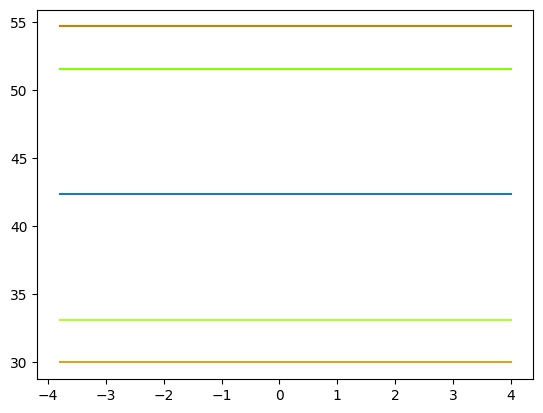

In [ ]:
plt.plot(X, theta_0_np)
plt.plot(X, lw2_np, color = 'goldenrod')
plt.plot(X, up2_np, color = 'darkgoldenrod')
plt.plot(X, lw1_np, color = 'greenyellow')
plt.plot(X, up1_np, color = 'chartreuse')

# Задание 1.5


Для построения гистограммы определим количество через оценки: формулу Стерджеса и квадратным корнем.

l + 1 = [$3.32 \lg n$] + 1

l + 1 = [$\sqrt{n}$] + 1

Количество интервалов $l$ должно быть не больше второй оценки и не меньше первой.

In [ ]:
L1 = 1 + int(3.32*np.log10(n))
l1 = L1-1
print(l1)
L2 = 1 + int(np.sqrt(n))
l2 = L2-1
print(l2)

5
6


Берем l=6

Гистограмма является оценкой плотности совместного распределения
выборки. Общий вид гистограммы:
$$
\hat{f}_n(x) =
\begin{cases}
\frac{n_k}{n(t_{k+1}-t_k)}, & x \in [t_k; t_{k+1}) \\
0, & x \in (t_0; t_1) \cup (t_l; t_{l+1})
\end{cases}
$$
где $t_k$ - точка разбиения, $t_0 = -\infty$, $t_{l+1} = +\infty$, $n_k$ - число элементов
выборки, попавших в полуинтервал $[t_k; t_{k+1})$.

Для построения гистограммы возьмем одно число $\Delta$, на которое будут отличаться все соседние точки разбиения, т.е.: $t_{k+1} = t_k + \Delta$,
где $\Delta = \frac{x_{(n)} - x_{(1)}}{l-1}$, $x_{(n)}, x_{(1)}$ – экстремальные порядковые статистики.
$$
\hat{f}_n(x) =
\begin{cases}
\frac{n_k}{n \cdot \Delta}, & x \in [t_k; t_{k+1}) \\
0, & x \in (t_0; t_1) \cup (t_l; t_{l+1})
\end{cases}
$$
Остаток регрессии – это разница между исходным сигналом и его оценкой, т.е.
оценка ошибки сигнала: $\hat{E}_{n \times 1} = Y - A\hat{\Theta}$.

In [ ]:
l=6
delta = (max(E1)-min(E1))/(l-1)
delta

18.470493774031993

In [ ]:
gaps = []
for i in range(l):
  gaps =  np.append(gaps, min(E1) + delta*i)
gaps

array([-33.56538259, -15.09488882,   3.37560496,  21.84609873,
        40.3165925 ,  58.78708628])

Количество точек в промежутках.

In [ ]:
count = [0]
for i in range(1, l):
  temp = 0
  print(gaps[i-1])
  print(gaps[i])
  for j in range(n):
    if gaps[i-1] <= E1[j] and E1[j] <= gaps[i]:
      temp += 1
  count = np.append(count, temp)
count = np.append(count, 0)
print(count, np.sum(count))

-33.5653825928943
-15.094888818862309
-15.094888818862309
3.3756049551696847
3.3756049551696847
21.846098729201678
21.846098729201678
40.31659250323367
40.31659250323367
58.787086277265665
[ 0 17  8  5  5  5  0] 40


Значения $\hat{f}_n(x)$:

In [ ]:
fn = [0] * len(count)
for i in range(len(count)):
  fn[i] = count[i] / (n * delta)

fn

[0.0,
 0.023009671814920037,
 0.010828080854080017,
 0.006767550533800011,
 0.006767550533800011,
 0.006767550533800011,
 0.0]

$$
\hat{f}_n(x) =
\begin{cases}
0, & x \in (-\infty; -33.5653) \\
\frac{17}{40 \cdot 18.4704}, & x \in [-33.5653; -15.0948) \\
\frac{8}{40 \cdot 18.4704}, & x \in [-15.0948; 3.3756) \\
\frac{5}{40 \cdot 18.4704}, & x \in [3.3756; 21.8460) \\
\frac{5}{40 \cdot 18.4704}, & x \in [21.8460; 40.3165) \\
\frac{5}{40 \cdot 18.4704}, & x \in [40.3165; 58.7870] \\
0, & x \in (58.7870; \infty)
\end{cases}
$$

(array([0.02308803, 0.01086495, 0.0067906 , 0.0067906 , 0.0067906 ]),
 array([-32.29104 , -13.883232,   4.524576,  22.932384,  41.340192,
         59.748   ]),
 <BarContainer object of 5 artists>)

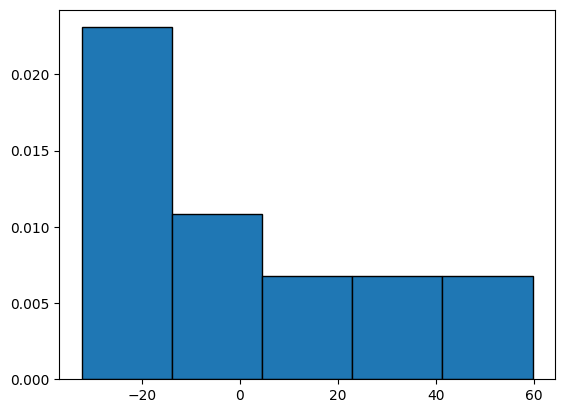

In [ ]:
plt.hist(E1, bins = l-1, density=True, edgecolor = 'black')

# Задание 1.6

В нормальной регрессии МП-оценка $\hat{\sigma}_{МП}^2 = S(\hat{\theta})/n$, где $S(\hat{\theta}) = (Y - A\hat{\Theta})^T (Y - A\hat{\Theta})$, $n$ - объём выборки, $p$ - число параметров.

$\hat{\sigma}_{МП}^2 = S(\hat{\theta})/n \approx 810.9427$

In [ ]:
sigma2 = S1/n
print(sigma2)

810.9427560548929


# Задание 1.7

Для проверки нормальности распределения ошибок требуется использовать $\chi^2$ - критерий Пирсона. В данном случае основная и альтернативная гипотезы этого критерия имеют вид:

$H_0: E \sim N(0, \theta)$; $H_A: E \nsim N(0, \theta)$.

Гипотезы выглядят так, потому что оба параметра нам неизвестны. В таком случае вместо $m$ и $\sigma^2$ можно подставить МП-оценки этих параметров. Ввиду того, что предполагается нормальная модель регрессии, то $m = 0$ при оценивании дисперсии по методу МП.

Оценим дисперсию по МП:
$$
L = \prod_{k=1}^{40} p(x = \hat{E}_k | \sigma^2) = \prod_{k=1}^{40} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{x_k^2}{2\sigma^2}} = (2\pi\sigma^2)^{-20} e^{-\frac{1}{2\sigma^2} \sum_{k=1}^{40} x_k^2}
$$
$$
\overline{L} = -20 \ln 2\pi\sigma^2 - \frac{1}{2\sigma^2} \sum_{k=1}^{40} x_k^2
$$
$$
\frac{\partial \overline{L}}{\partial \sigma^2} = -\frac{20}{\sigma^2} + \frac{1}{2\sigma^4} \sum_{k=1}^{40} x_k^2 = 0
$$
$$
-40\sigma^2 + \sum_{k=1}^{40} x_k^2 = 0
$$
$$
\hat{\sigma}_{МП}^2 = \frac{1}{40} \sum_{k=1}^{40} x_k^2
$$

МП-оценка у нас была в 6 задании. Возьмем значение оттуда:
$\hat{\sigma}_{МП}^2 \approx 810.9427$

После расчёта оценочных параметров для гипотезы требуется проверить саму гипотезу. Для начала требуется построить гистограмму. Затем надо высчитать статистику критерия, имеющую вид:
$$
T_{\chi^2}(Z_n) = np_0 + \sum_{k=1}^{l-1} \frac{(n_k - np_k)^2}{np_k} + np_l,
$$
где $p_k$ - вероятность попадания в интервал $[t_k; t_{k+1})$ гистограммы задания 5,
$n_k$ - количество элементов, попавших в интервал $[t_k; t_{k+1})$ гистограммы задания 5.

После расчёта статистики надо рассмотреть - попала ли статистика в доверительный интервал $G_{0\alpha}$, который имеет вид:
$$
G_{0\alpha} = [0; \chi_{1-\alpha, (\hat{l} - s)}^2],
$$
где $\hat{l} + 1$ - количество промежутков, вероятность попадания в которые неравна 0, $s$ - количество неизвестных параметров.

Если гипотеза $H_0$ не будет принята, то гипотеза о нормальном распределении остатков отклоняется.

Расчёт

In [ ]:
import scipy.stats as sts

In [ ]:
p = []
p = np.append(p, sts.norm.cdf(gaps[0] / np.sqrt(sigma2)))

for i in range(1, len(gaps) - 1):
  p = np.append(p, sts.norm.cdf((gaps[i+1]) / np.sqrt(sigma2)) - sts.norm.cdf((gaps[i]) / np.sqrt(sigma2)))

p = np.append(p, sts.norm.cdf((-gaps[-1]) / np.sqrt(sigma2)))
p

array([0.11926249, 0.24914816, 0.23132386, 0.14307362, 0.05893185,
       0.01949148])

Количество промежутков ненулевой вероятности: $7 = \hat{l} + 1 \rightarrow \hat{l} = 6$

$$T_{\chi^2}(Z_n) = 40 \cdot 0.1192 + \sum_{k=1}^5 \frac{(n_k - 40p_k)^2}{40p_k} + 40 \cdot 0.01949 \approx 13.7386$$

$\alpha = 0.05$. Квантиль: $\chi_{1-0.05,(6-1)}^2 = \chi_{0.95,(5)}^2 \approx 11.0705$

In [ ]:
Tzn = n*p[0] + n*p[-1]
for i in range(1, len(p)-1):
  Tzn += (count[i] - n*p[i])**2 / (n*p[i])
print(Tzn)

k_95_5= 11.0705
if 0 <= Tzn <= k_95_5:
  print('Статитстика попала в доверительный интервал.')
else:
  print ('Гипотеза о нормальном распределении остатков отклоняется.')

13.738628678813578
Гипотеза о нормальном распределении остатков отклоняется.


## Второй случай

Порядок исходного сигнала m = 2.
Выборка имеет вид:


In [ ]:
m=2
n=40
sigma = 2.0
theta = np.array([10.5, -3, 6, 0.12])
eps = np.random.uniform(-np.sqrt(3*sigma), np.sqrt(3*sigma), 40)

# Задание 2.1

In [ ]:
X = np.array([-4+k*8/n for k in range(1, n+1)])
Y = np.zeros(40)
for k in range(40):
  for i in range(m+1):
    Y[k] += theta[i]*X[k]**i
#print('\n',Y)
Y = Y + eps

In [ ]:
print("Вектор ошибок:", eps)
#print(eps.size)
print('\n',Y)

Вектор ошибок: [-2.36142917  2.26915578 -0.76656237 -0.92994025  2.10368672  2.34247517
  1.17918379 -0.24709056  0.54637302  1.28339198 -2.16556913 -1.50892789
  0.93251039  0.72279201 -0.81243069 -2.0070509  -0.08322356 -0.99621572
 -0.1617459  -1.13784467  0.01827594  1.33610562 -1.49107545 -2.0244219
  1.69982234  0.15686983 -0.03390752 -2.04923534  0.48198055  0.37839197
  0.39929424  0.47988867  0.45206628 -2.41133183  1.95303478  0.207833
  0.54556101  1.79316538 -1.11326742 -0.19153824]

 [106.17857083 101.32915578  89.29343763  80.61005975  75.60368672
  68.28247517  60.03918379  52.01290944  46.68637302  41.78339198
  33.17443087  29.15107211  27.39251039  23.46279201  18.68756931
  14.7329491   14.37677644  11.66378428  11.1782541    9.36215533
  10.15827594  11.59610562   9.36892455   9.9155781   15.19982234
  15.69686983  18.02609248  19.01076466  25.02198055  28.87839197
  33.33929424  38.33988867  43.71206628  46.72866817  57.45303478
  62.547833    70.20556101  79.25316

Все формулы для критерия Фишера аналогичны, будем поочередно поднимать порядок $\hat{m}$ и проверять будет ли значение статистики попадать в критическую область.

Начнем опять с p=1

Уровень значимости $\alpha = 0.05$, следовательно, уровень надежности $1 - \alpha = 0.95$

$f_{0.95,1,40-2} \approx 4.098$

In [ ]:
p=1
A1_T = np.array([np.ones(n), X])

Z, Th2 = kriteriy_Fishera(p, A1_T, Y)
print(Z, '\n', Th2)

0.7940573661386626 
 [42.39022525 -1.80499003]


Значение Z < 4.098, значит статистика попала в доверительную область, следовательно, порядок многочлена для модели (1) есть p-1 = 0

Следовательно порядок многочлена $\hat{m} = p - 1 = 0$ для модели (1).

Переопределим основные матрицы.

In [ ]:
A1_T = np.array([np.ones(n)])
Th = 1/n * A1_T @ Y
print(Th)
W = 1/n
E1 = Y - np.dot(A1_T.T, Th)
print(E1)
S1 = np.dot(E1.T, E1)
print(S1)

[42.20972625]
[ 63.96884458  59.11942953  47.08371138  38.4003335   33.39396047
  26.07274892  17.82945754   9.80318319   4.47664677  -0.42633427
  -9.03529538 -13.05865414 -14.81721586 -18.74693424 -23.52215693
 -27.47677715 -27.83294981 -30.54594197 -31.03147215 -32.84757091
 -32.05145031 -30.61362063 -32.8408017  -32.29414815 -27.00990391
 -26.51285642 -24.18363377 -23.19896159 -17.1877457  -13.33133428
  -8.87043201  -3.86983758   1.50234004   4.51894192  15.24330854
  20.33810675  27.99583476  37.04343913  42.41700633  52.09873551]
33935.178788347


МНК-оценки параметров $\hat{\theta}$ вычисляются по формуле $(A^T A)^{-1} A^T Y$.

$\hat{\theta}_{1 \times 1} = (42.20972625)$

In [ ]:
P = p-1

# Задание 2.2

Доверительные интервалы вычисляются по той же формуле.
$$
P\left(\hat{\theta}_j - t_{1-\alpha/2,\,n-p} \sqrt{\frac{c_{jj} S(\hat{\theta})}{n-p}} \leq \theta_j \leq \hat{\theta}_j + t_{1-\alpha/2,\,n-p} \sqrt{\frac{c_{jj} S(\hat{\theta})}{n-p}}\right) = 1 - \alpha
$$

Уровни надежности $\alpha_1 = 0.95$ и $\alpha_2 = 0.99$, следовательно:

$1 - \alpha_1/2 = 0.975$, $1 - \alpha_2/2 = 0.995$,

$t_{0.975,\,39} \approx 2.0227$; $t_{0.995,\,39} \approx 2.7079$

In [ ]:
t_975 = 2.0227
t_995 = 2.7079

for i in range(P+1):
  l1 = Th[i] - t_975*np.sqrt((W*S1)/(n-P-1))
  r1 = Th[i] + t_975*np.sqrt((W*S1)/(n-P-1))
  l2 = Th[i] - t_995*np.sqrt((W*S1)/(n-P-1))
  r2 = Th[i] + t_995*np.sqrt((W*S1)/(n-P-1))
  print(f"Доверительный интервал уровня надежности 0.95 для тета_{i}: {l1} <= {Th[i]} <= {r1}")
  print(f"Доверительный интервал уровня надежности 0.99 для тета_{i}: {l2} <= {Th[i]} <= {r2}")

Доверительный интервал уровня надежности 0.95 для тета_0: 32.775761565653696 <= 42.209726248895095 <= 51.643690932136494
Доверительный интервал уровня надежности 0.99 для тета_0: 29.579957639734374 <= 42.209726248895095 <= 54.839494858055815


# Задание 2.3


Доверительные интервалы:

In [ ]:
lower1 = Th[0] - t_975*np.sqrt((S1/(n-P-1)) *  W)
upper1 = Th[0] + t_975*np.sqrt((S1/(n-P-1)) *  W)
lower2 = Th[0] - t_995*np.sqrt((S1/(n-P-1)) *  W)
upper2 = Th[0] + t_995*np.sqrt((S1/(n-P-1)) *  W)

print("Доверительный интервал уровня надёжности 0.95:")
print(lower1, "< theta_0 <", upper1)
print("Доверительный интервал уровня надёжности 0.99:")
print(lower2, "< theta_0 <", upper2)

Доверительный интервал уровня надёжности 0.95:
32.775761565653696 < theta_0 < 51.643690932136494
Доверительный интервал уровня надёжности 0.99:
29.579957639734374 < theta_0 < 54.839494858055815


# Задание 2.4

**Набор наблюдений, истинный полезный сигнал, его оценка и доверительный интервал для уровня надежности 0.95:**

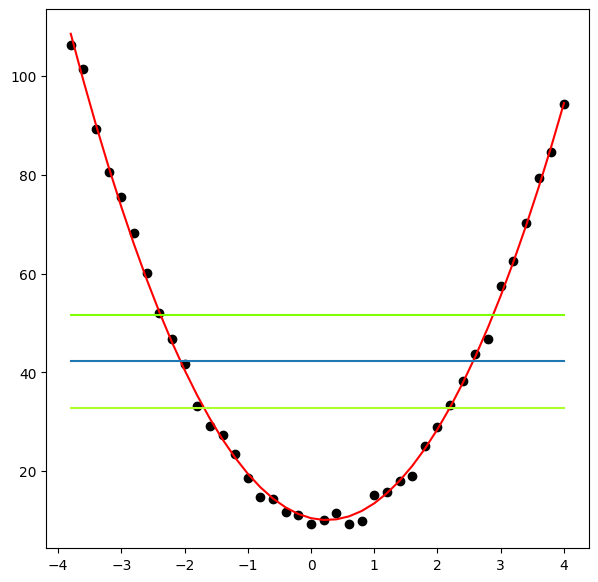

In [ ]:
phi = Y - eps
theta_0_np = np.ones(n)*Th[0]
lw1_np = np.ones(n)*lower1
up1_np = np.ones(n)*upper1

plt.figure(figsize=(7, 7))
plt.plot(X, phi, color = 'r') # теор. сигнал
plt.plot(X, theta_0_np) # его оценка
plt.scatter(X, Y, color = 'black') # набор наблюдений
plt.plot(X, lw1_np, color = 'greenyellow')
plt.plot(X, up1_np, color = 'chartreuse')

**Набор наблюдений, истинный полезный сигнал, его оценка и доверительный интервал для уровня надежности 0.99:**

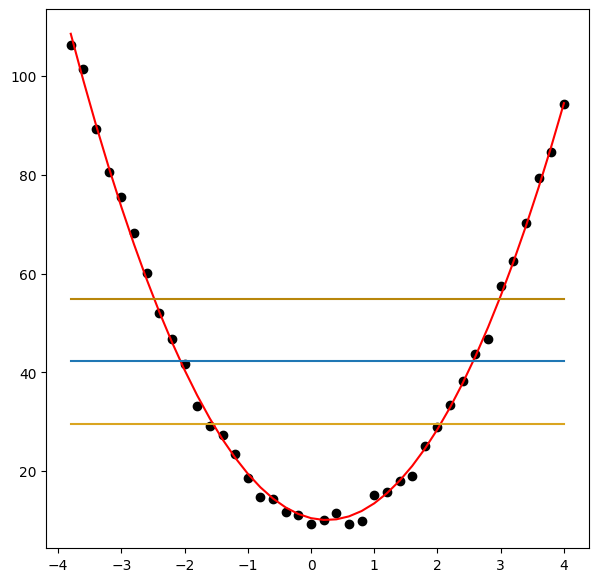

In [ ]:
lw2_np = np.ones(n)*lower2
up2_np = np.ones(n)*upper2

plt.figure(figsize=(7, 7))
plt.scatter(X, Y, color = 'black')
plt.plot(X, phi, color = 'r') # теор. сигнал
plt.plot(X, theta_0_np) # его оценка
plt.plot(X, lw2_np, color = 'goldenrod')
plt.plot(X, up2_np, color = 'darkgoldenrod')

**График для наглядного сравнения доверительных интервалов:**

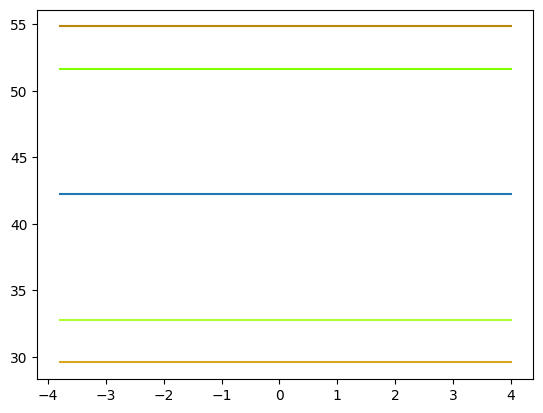

In [ ]:
plt.plot(X, theta_0_np)
plt.plot(X, lw2_np, color = 'goldenrod')
plt.plot(X, up2_np, color = 'darkgoldenrod')
plt.plot(X, lw1_np, color = 'greenyellow')
plt.plot(X, up1_np, color = 'chartreuse')

# Задание 2.5

Для построения гистограммы определим количество через оценки: формулу Стерджеса и квадратным корнем.
$$l + 1 = [3.32 \lg n] + 1$$
$$l + 1 = [\sqrt{n}] + 1$$
Количество интервалов $l$ должно быть не больше второй оценки и не меньше первой.

Берем l=6

In [ ]:
l=6
delta = (max(E1)-min(E1))/(l-1)
delta

19.363283098668802

In [ ]:
gaps = []
for i in range(l):
  gaps =  np.append(gaps, min(E1) + delta*i)
gaps

array([-32.84757091, -13.48428782,   5.87899528,  25.24227838,
        44.60556148,  63.96884458])

Количество точек в промежутках:

In [ ]:
count = [0]
for i in range(1, l):
  temp = 0
  print(gaps[i-1])
  print(gaps[i])
  for j in range(n):
    if gaps[i-1] <= E1[j] and E1[j] <= gaps[i]:
      temp += 1
  count = np.append(count, temp)
count = np.append(count, 0)
print(count, np.sum(count))

-32.84757091399959
-13.484287815330788
-13.484287815330788
5.878995283338014
5.878995283338014
25.242278382006816
25.242278382006816
44.60556148067562
44.60556148067562
63.96884457934442
[ 0 17  9  4  6  4  0] 40


Значения $\hat{f}_n(x)$:

In [ ]:
fn = [0] * len(count)
for i in range(len(count)):
  fn[i] = count[i] / (n * delta)
fn

[0.0,
 0.021948757234728347,
 0.011619930300738537,
 0.005164413466994905,
 0.007746620200492358,
 0.005164413466994905,
 0.0]

$$
\hat{f}_n(x) =
\begin{cases}
0, & x \in (-\infty; -32.8475) \\
\frac{17}{40 \cdot 19.3632}, & x \in [-32.8475; -13.4842) \\
\frac{9}{40 \cdot 19.3632}, & x \in [-13.4842; 5.8789) \\
\frac{4}{40 \cdot 19.3632}, & x \in [5.8789; 25.2422) \\
\frac{6}{40 \cdot 19.3632}, & x \in [25.2422; 44.6055) \\
\frac{4}{40 \cdot 19.3632}, & x \in [44.6055; 63.9688] \\
0, & x \in (63.9688; \infty)
\end{cases}
$$

(array([0.02194876, 0.01161993, 0.00516441, 0.00774662, 0.00516441]),
 array([-32.84757091, -13.48428782,   5.87899528,  25.24227838,
         44.60556148,  63.96884458]),
 <BarContainer object of 5 artists>)

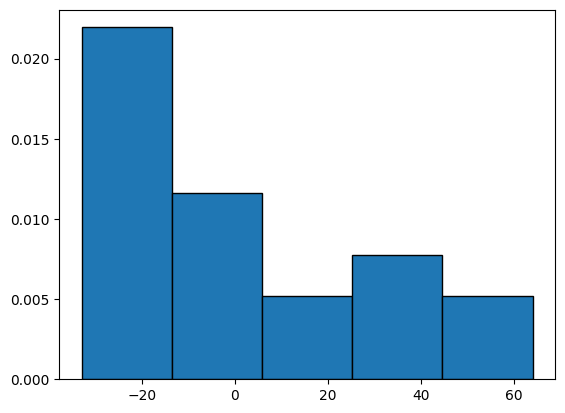

In [ ]:
plt.hist(E1, bins = l-1, density=True, edgecolor = 'black')

# Задание 2.6

В нормальной регрессии МП-оценка $\hat{\sigma}_{МП}^2 = S(\hat{\theta})/n$, где $S(\hat{\theta}) = (Y - A\hat{\Theta})^T (Y - A\hat{\Theta})$, $n$ - объём выборки, $p$ - число параметров.

$\hat{\sigma}_{МП}^2 = S(\hat{\theta})/n \approx 848.3794$

In [ ]:
sigma2 = S1/n
print(sigma2)

848.3794697086751


# Задание 2.7

Расчёт

In [ ]:
import scipy.stats as sts

In [ ]:
p = []
p = np.append(p, sts.norm.cdf(gaps[0] / np.sqrt(sigma2)))

for i in range(1, len(gaps) - 1):
  p = np.append(p, sts.norm.cdf((gaps[i+1]) / np.sqrt(sigma2)) - sts.norm.cdf((gaps[i]) / np.sqrt(sigma2)))

p = np.append(p, sts.norm.cdf((-gaps[-1]) / np.sqrt(sigma2)))
p

array([0.12971531, 0.2582787 , 0.22694824, 0.13023954, 0.04879444,
       0.01403854])

Количество промежутков ненулевой вероятности: $7 = \hat{l} + 1 \rightarrow \hat{l} = 6$

$$T_{\chi^2}(Z_n) = 40 \cdot 0.1297 + \sum_{k=1}^5 \frac{(n_k - 40p_k)^2}{40p_k} + 40 \cdot 0.01403 \approx 18.7329$$

$\alpha = 0.05$. Квантиль: $\chi_{1-0.05,(6-1)}^2 = \chi_{0.95,(5)}^2 = 11.0705$

In [ ]:
Tzn = n*p[0] + n*p[-1]
for i in range(1, len(p)-1):
  Tzn += (count[i] - n*p[i])**2 / (n*p[i])
print(Tzn)

k_95_5= 11.0705
if 0 <= Tzn <= k_95_5:
  print('Статитстика попала в доверительный интервал.')
else:
  print ('Гипотеза о нормальном распределении остатков отклоняется.')

18.732976137700717
Гипотеза о нормальном распределении остатков отклоняется.
